# BCI with dictionary learning

## Projet description
- Use the BNCI 2014-001 Motor Imagery dataset dataset:
moabb.neurotechx.com/docs/generated/moabb.datasets.BNCI2014001.html
- Learn some dictionary on the 9 subjects and all session.
- The objective of the project is to predict which movement the subject is performing in each trial.
- Doing this project you will learn about MNE, BIDS format, and alphacsc.

## Dataset description
This data set consists of EEG data from 9 subjects. The cue-based BCI paradigm
consisted of four different motor imagery tasks, namely the imag- ination of
movement of the left hand (class 1), right hand (class 2), both feet (class 3),
and tongue (class 4). Two sessions on different days were recorded for each
subject. Each session is comprised of 6 runs separated by short breaks.
One run consists of 48 trials (12 for each of the four possible classes),
yielding a total of 288 trials per session.

The subjects were sitting in a comfortable armchair in front of a computer
screen. At the beginning of a trial (t = 0 s), a fixation cross appeared on
the black screen. In addition, a short acoustic warning tone was presented.
After two seconds (t = 2 s), a cue in the form of an arrow pointing either to
the left, right, down or up (corresponding to one of the four classes left
hand, right hand, foot or tongue) appeared and stayed on the screen for 1.25 s.
This prompted the subjects to perform the desired motor imagery task.
No feedback was provided. The subjects were ask to carry out the motor imagery
task until the fixation cross disappeared from the screen at t = 6 s.

Twenty-two Ag/AgCl electrodes (with inter-electrode distances of 3.5 cm) were
used to record the EEG; the montage is shown in Figure 3 left. All signals were
recorded monopolarly with the left mastoid serving as reference and the right
mastoid as ground. The signals were sampled with. 250 Hz and bandpass-filtered
between 0.5 Hz and 100 Hz. The sensitivity of the amplifier was set to 100 μV.
An additional 50 Hz notch filter was enabled to suppress line noise


In [92]:
import mne
import moabb
from moabb.datasets import BNCI2014001
from moabb.paradigms import MotorImagery

%matplotlib qt

In [93]:
dataset = BNCI2014001()
dataset.download()

Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      

    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 dat

## Exploration

In [94]:
event_id = dataset.event_id
print(event_id)

{'left_hand': 1, 'right_hand': 2, 'feet': 3, 'tongue': 4}


In [95]:
data = dataset.get_data()
# data = {'subject_id' :           # 1, 2, 3, 4, 5, 6, 7, 8, 9
#             {'session_id':       # 'session_T', 'session_E'
#                 {'run_id': raw}  # 'run_{X}', X = 0, 1, 2, 3, 4, 5
#             }
#         }
raw = data[1]['session_T']['run_0']
print(raw.ch_names)

['Fz', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'P1', 'Pz', 'P2', 'POz', 'EOG1', 'EOG2', 'EOG3', 'stim']


In [111]:
paradigm = MotorImagery(n_classes=4, fmin=1, fmax=32,
                        tmin=-2, tmax=None,
                        baseline=(-2, 0))

subjects = [1]
X, y, metadata = paradigm.get_data(
    dataset=dataset, subjects=subjects, return_epochs=True)

Choosing from all possible events


Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Not setting metadat

In [97]:
cond = 'left_hand'
ch = 'FC3'
X[cond].plot_image(picks=[ch], title=f'{cond}, channel {ch}')

Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[<Figure size 1280x960 with 4 Axes>]

In [107]:
X

<Epochs |  576 events (all good), 0 - 6 sec, baseline 0 – 2 sec, ~145.2 MB, data loaded,
 'left_hand': 144
 'right_hand': 144
 'feet': 144
 'tongue': 144>

Make evoked

In [112]:
X.set_eeg_reference('average')

evokeds_list = X.average(by_event_type=True)
# Show condition names and baseline intervals
for e in evokeds_list:
    print(f'Condition: {e.comment}, baseline: {e.baseline}')
    
evks = dict(zip(X.event_id.keys(), evokeds_list))
for this_cond, this_evk in evks.items():
    #this_evk.plot(
    #    spatial_colors=True, gfp=True, time_unit='s', titles=dict(eeg=this_cond))
    this_evk.plot_joint(title=this_cond)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Condition: left_hand, baseline: (0.0, 2.0)
Condition: right_hand, baseline: (0.0, 2.0)
Condition: feet, baseline: (0.0, 2.0)
Condition: tongue, baseline: (0.0, 2.0)
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.


In [99]:
mne.viz.plot_compare_evokeds(evks, legend='upper right')

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


[<Figure size 1600x1200 with 1 Axes>]

## ICA

Using EOG channels: EOG1, EOG2, EOG3
EOG channel index for this subject is: [22 23 24]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 74 significant peaks
Number of EOG events detected: 74
Not setting metadata
74 matching events found
No baseline correction applied
Using data from preloaded Raw for 74 events and 251 original time points ...
1 bad epochs dropped
Applying baseline correction (mode: mean)
No projecto

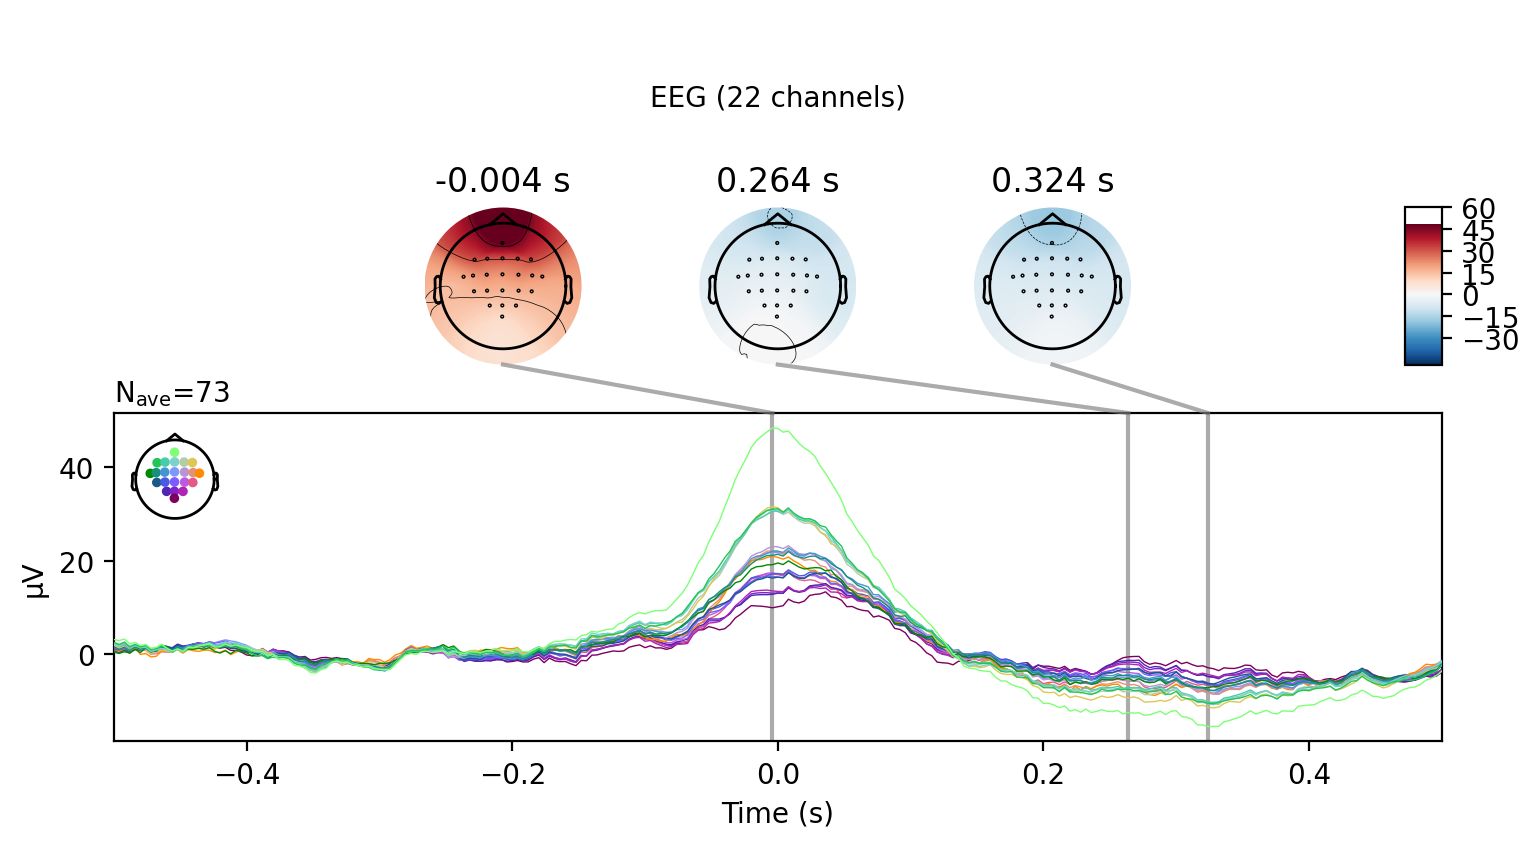

In [100]:
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)

raw = data[1]['session_T']['run_0']
eog_evoked = create_eog_epochs(raw).average()
eog_evoked.apply_baseline(baseline=(None, -0.2))
eog_evoked.plot_joint()

In [101]:
filt_raw = raw.copy().filter(l_freq=1., h_freq=None)
ica = ICA(n_components=15, max_iter='auto', random_state=97)
ica.fit(filt_raw)
ica

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 sec)

Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 1.0s.


<ICA | raw data decomposition, method: fastica (fit in 42 iterations on 96735 samples), 15 ICA components explaining 99.9 % of variance (22 PCA components available), channel types: eeg, no sources marked for exclusion>

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 15 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 15.00
- Lower transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 13.12 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 221 samples (0.884 sec)

Creating RawArray with float64 data, n_channels=18, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Opening ica-browser...


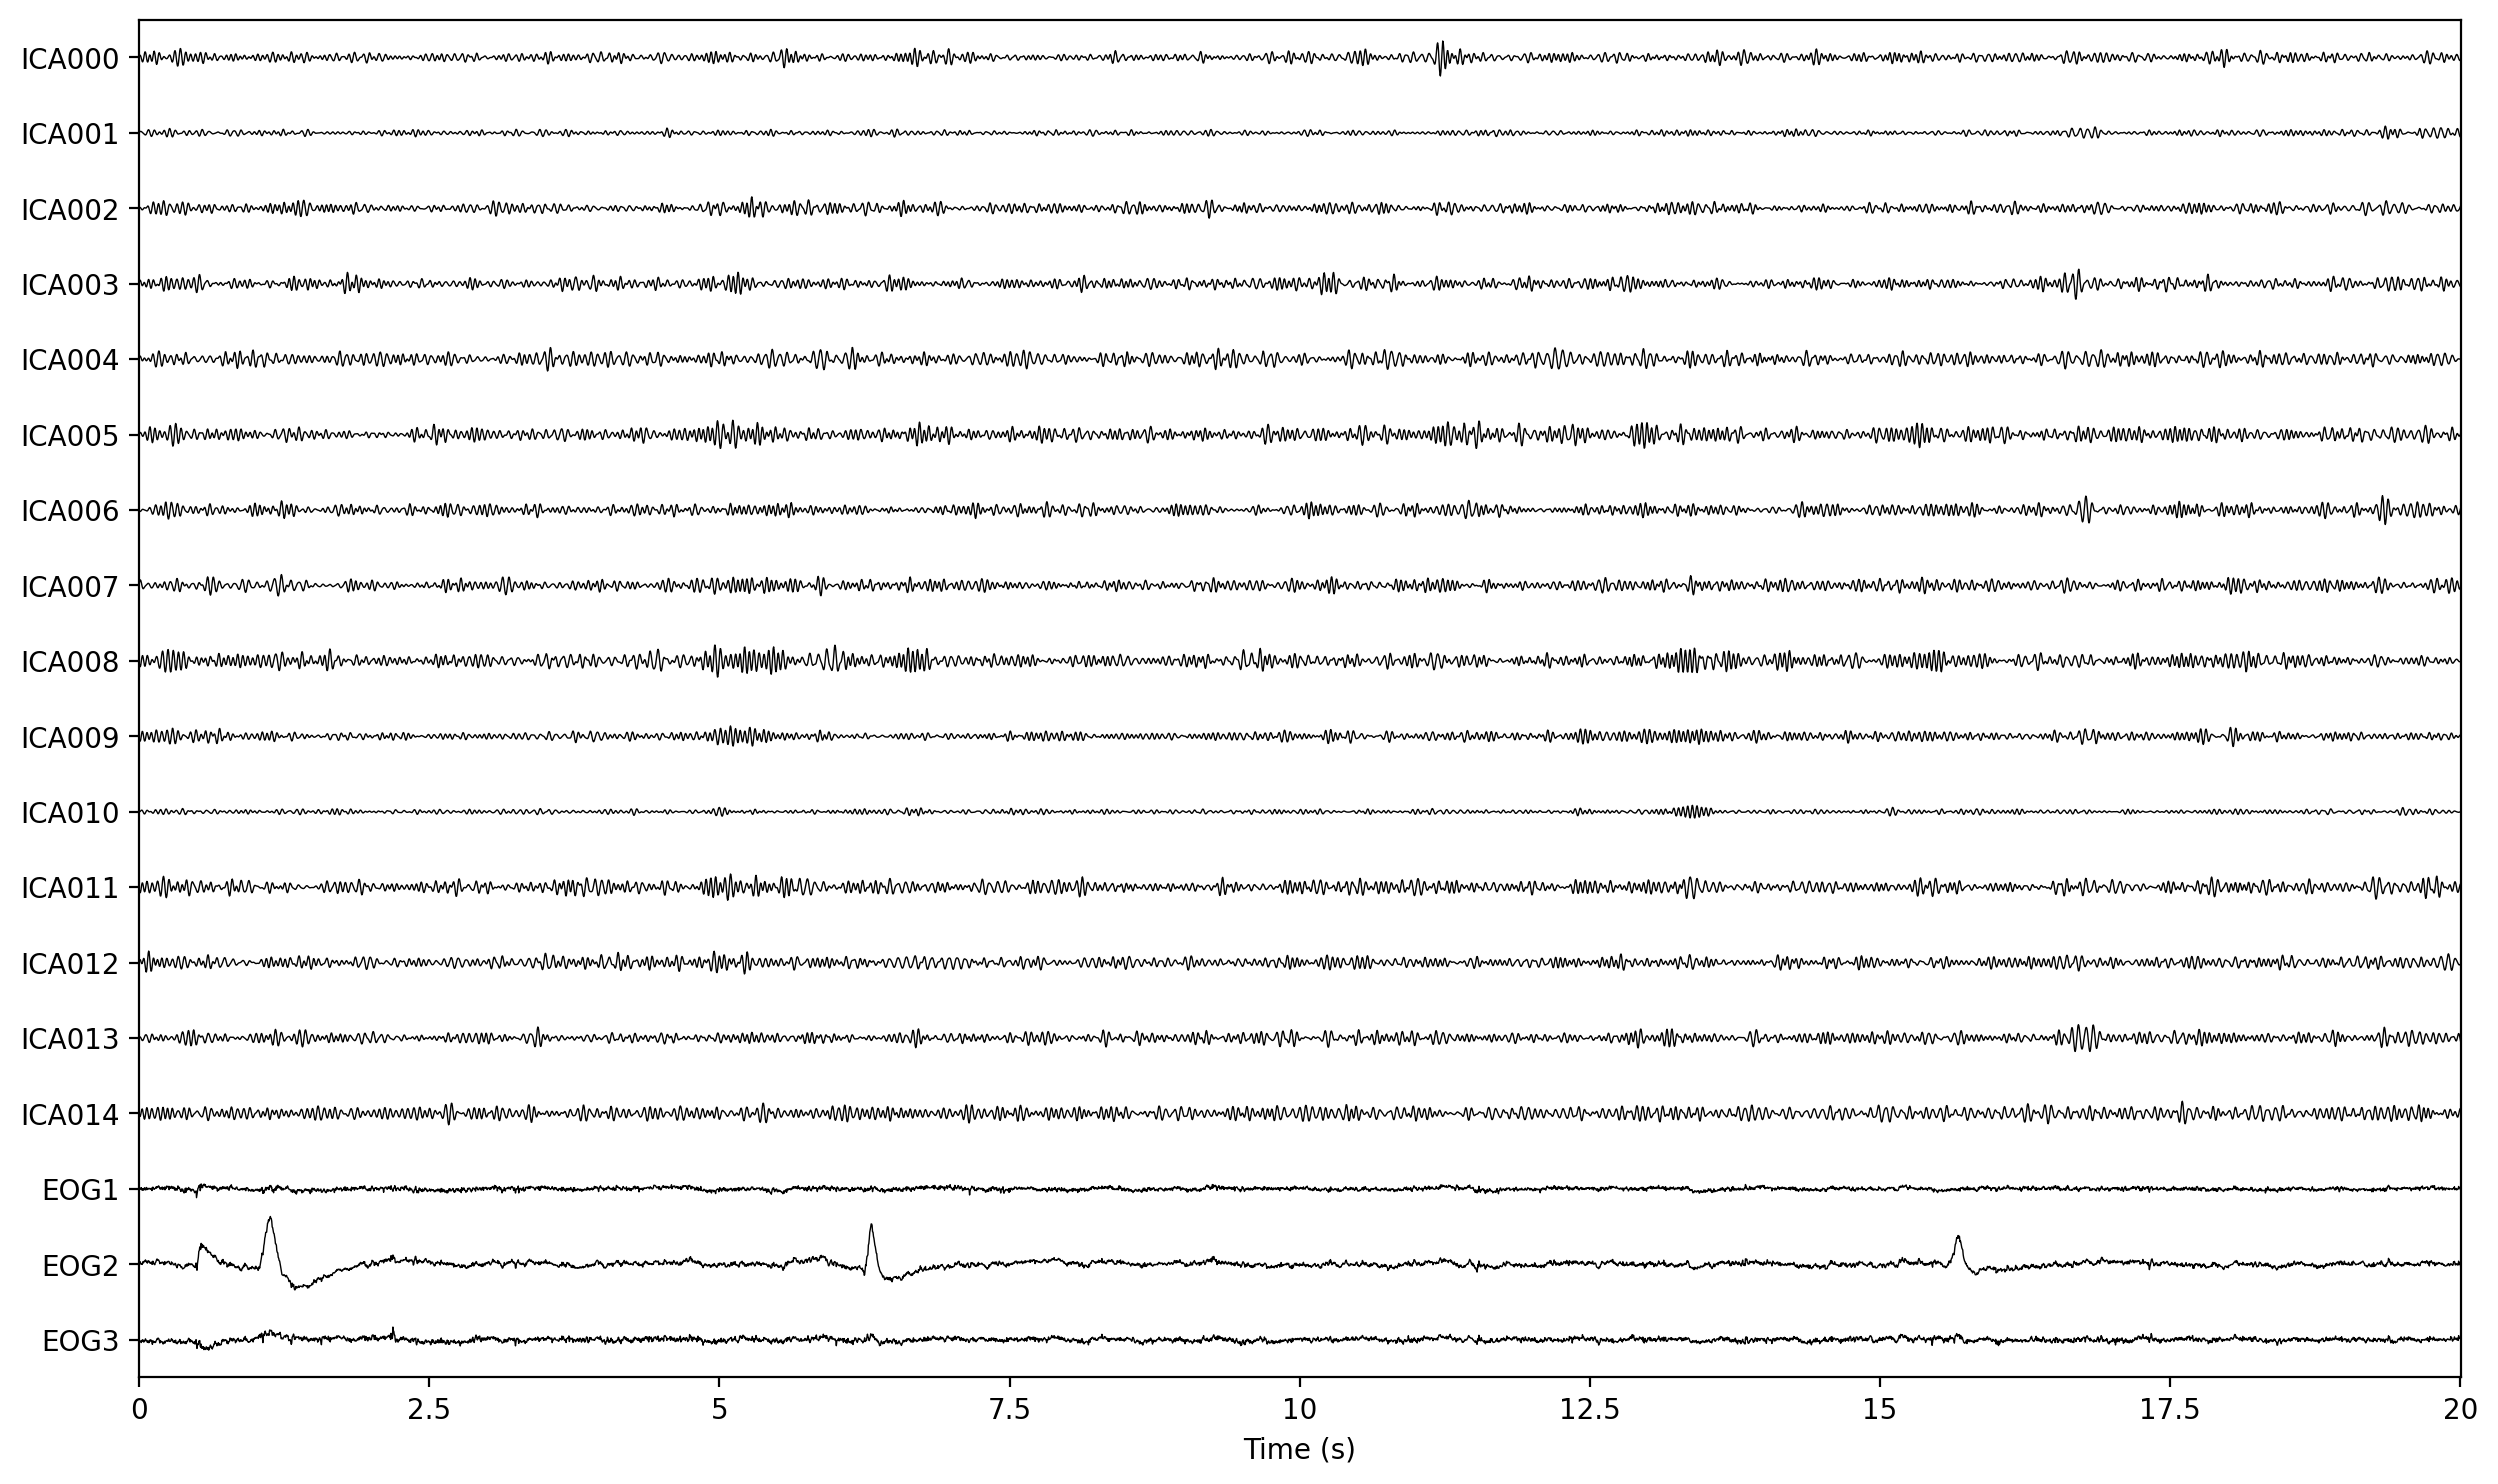

In [113]:
raw.load_data()
ica.plot_sources(raw.copy().filter(l_freq=15, h_freq=25), show_scrollbars=False)

In [114]:
raw_sources = ica.get_sources(raw)

In [118]:
X.events

array([[    250,       0,       4],
       [   2253,       0,       3],
       [   4171,       0,       2],
       ...,
       [1176911,       0,       3],
       [1179025,       0,       1],
       [1181084,       0,       3]])

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 15 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 15.00
- Lower transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 13.12 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 221 samples (0.884 sec)

Opening raw-browser...


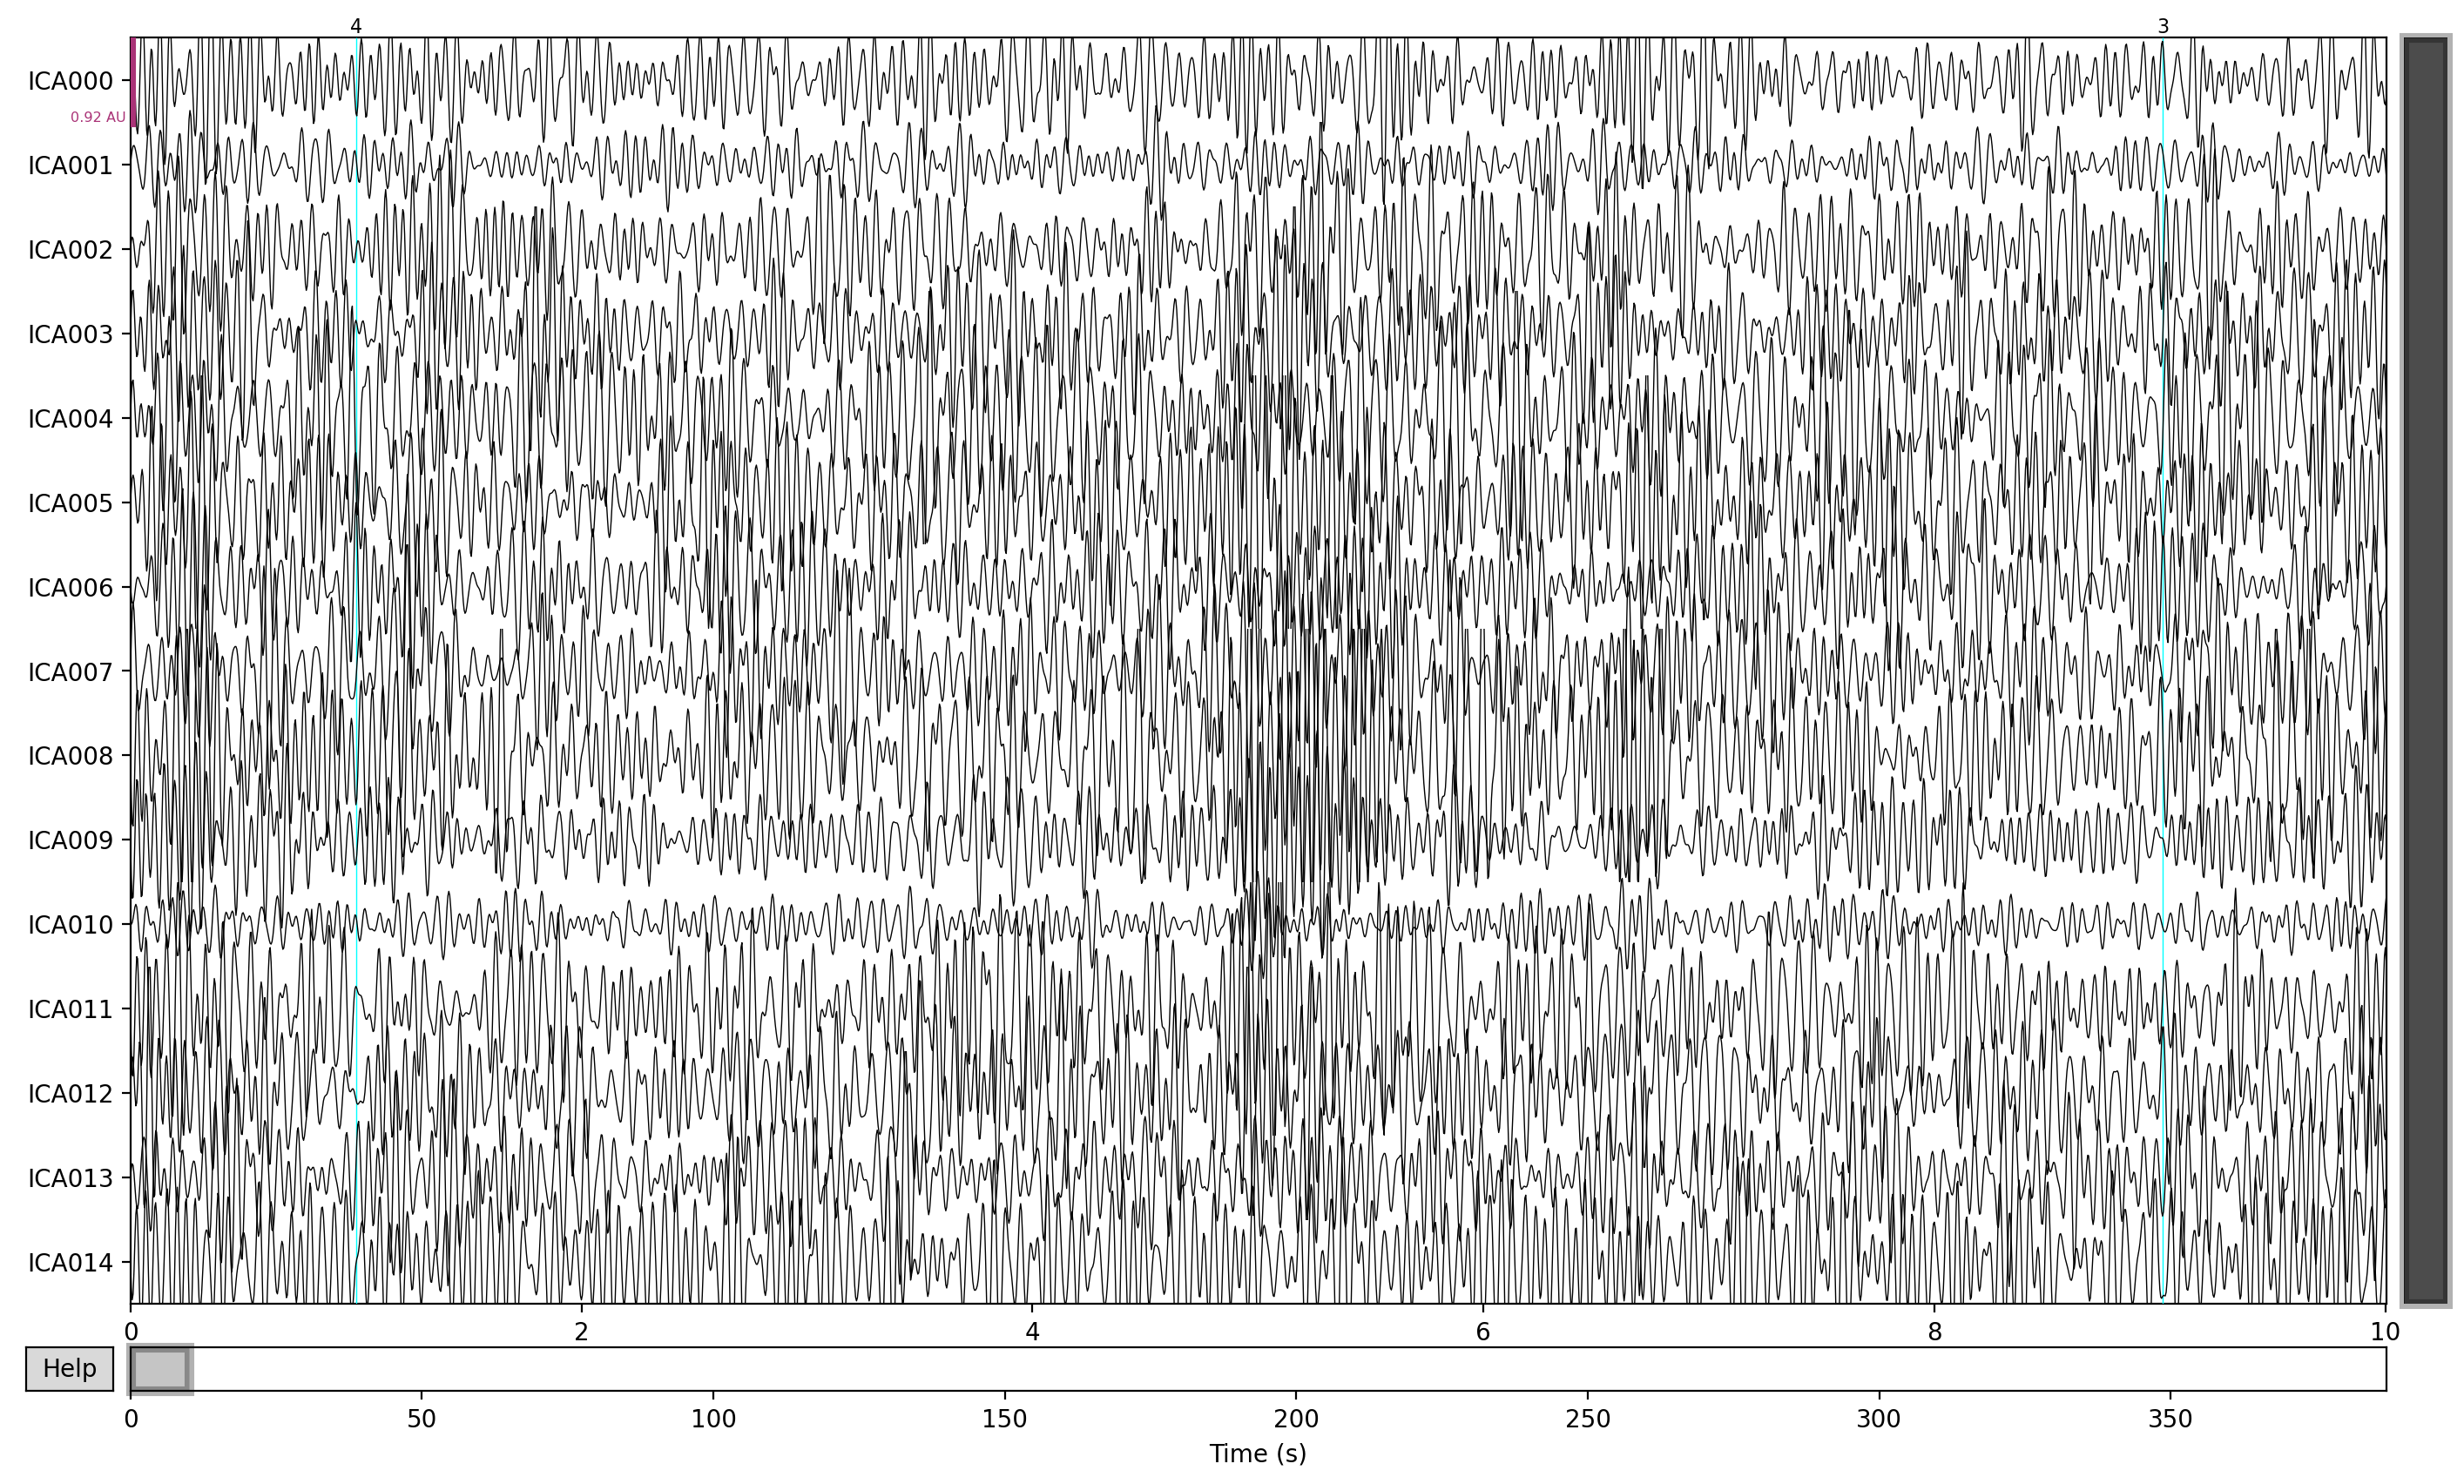

Closing ica-browser...
Closing raw-browser...
Channels marked as bad:
none


Traceback (most recent call last):
  File "/Users/cedricallain/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 287, in process
    func(*args, **kwargs)
  File "/Users/cedricallain/anaconda3/lib/python3.7/site-packages/mne/viz/_mpl_figure.py", line 103, in _close
    self.mne.parent_fig.mne.child_figs.remove(self)
ValueError: list.remove(x): x not in list


Closing raw-browser...
Channels marked as bad:
none
Closing ica-browser...


In [119]:
raw_sources.copy().filter(15, 25).plot(events=X.events)

In [103]:
ica.plot_components()

[<MNEFigure size 1950x1462 with 15 Axes>]

In [104]:
ica.plot_properties(raw, picks=[1])

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
193 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[<Figure size 1400x1200 with 6 Axes>]

## Dictionary Learning

What to expect to find, at least:
- eye-blink artefact (see ICA)
- visual evoked responses, following the cue at t = 2s for each trial
- 4 specific atoms corresponding to the task (left/right hand, feet and tongue): mainly in M1 (morotr cortex)

- faire baseline, regardez pyrieman

In [105]:
import alphacsc